## 패키지 import

In [105]:
import tensorflow as tf
# from tensorflow.examples.tutorials.mnist import input_data 
# 텐서플로우 1버전에서 사용하는 방법

In [106]:
import sys
import numpy as np
# 이미지 형태 출력을 위한 pyplot 모듈 import
import matplotlib.pyplot as plt

## MNIST data set import

In [107]:
mnist = tf.keras.datasets.mnist

In [108]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## 데이터 전처리

In [109]:
# normalization
x_train, x_test = x_train/255.0, x_test/255.0

## 모델 구성

In [110]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

## 데이터 시각화

Image Shape :  (28, 28)
Image Label :  5


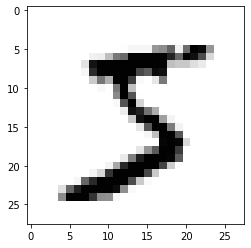

In [111]:
# 0번째 원소의 정보 출력
print("Image Shape : ", x_train[0].shape)
print("Image Label : ", y_train[0])

# 0번째 원소를 흑백으로 출력
plt.imshow(x_train[0].reshape(28, 28), cmap='Greys')
plt.show()

## 모델 구성

In [112]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

## 모델 컴파일

In [113]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

## 모델 요약

In [114]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 512)               401920    
                                                                 
 dense_22 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## 모델 훈련

In [118]:
history = model.fit(x_train, y_train,
          validation_split=0.1,
          epochs=5)

Epoch 1/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0222 - accuracy: 0.9930 - val_loss: 0.0627 - val_accuracy: 0.9845
Epoch 2/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0172 - accuracy: 0.9946 - val_loss: 0.0745 - val_accuracy: 0.9802
Epoch 3/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0122 - accuracy: 0.9962 - val_loss: 0.0845 - val_accuracy: 0.9800
Epoch 4/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0132 - accuracy: 0.9955 - val_loss: 0.0904 - val_accuracy: 0.9807
Epoch 5/5
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0110 - accuracy: 0.9961 - val_loss: 0.0769 - val_accuracy: 0.9835


## 훈련 과정 확인

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


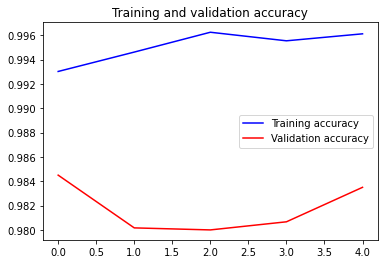

In [126]:
print(history.history.keys())
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(list(range(5)), train_accuracy, 'b', label='Training accuracy')
plt.plot(list(range(5)), val_accuracy, 'r', label='Validation accuracy')
plt.title("Training and validation accuracy")
plt.legend()
plt.show()

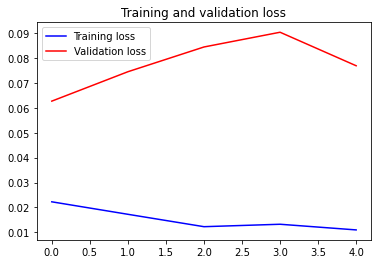

In [128]:
plt.figure()
plt.plot(list(range(5)), train_loss, 'b', label='Training loss')
plt.plot(list(range(5)), val_loss, 'r', label='Validation loss')
plt.title("Training and validation loss")
plt.legend()
plt.show()

## 모델 평가

In [129]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Accuracy : ", test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0768 - accuracy: 0.9821
Accuracy :  0.9821000099182129


## 결과 확인

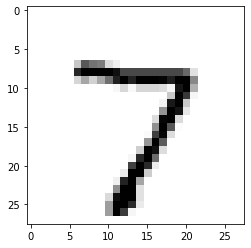

The predictions are  [[8.4389926e-09 1.0275048e-08 3.2390963e-06 1.5164099e-03 5.0308732e-13
  1.3338260e-07 1.3033025e-12 9.9846351e-01 2.6157616e-07 1.6469439e-05]]
The answer is  7


In [117]:
n = 0
plt.imshow(x_test[n].reshape(28, 28), cmap = 'Greys', interpolation = 'nearest')
plt.show()
print("The predictions are ", model.predict(x_test[n].reshape((1,28,28,1))))
print("The answer is ", np.argmax(model.predict(x_test[n].reshape((1,28,28,1)))))